<center><h1>Hong_Seungil_HW4</h1></center>

Name: Seungil Hong
<br>
Github Username: zonna19
<br>
USC ID: 2375832093 

## 1. Time Series Classification Part 1: Feature Creation/Extraction (HW3 Rerun)

### (a) Obtain Data

Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from builtins import range
import os
import glob
import re

Get the AReM Data Set

### (b) Splitting Data

In [2]:
def list_files_no_hidden(path):
    """Return a sorted list of all non-hidden files in the directory."""
    # Ensure that only files are listed (excluding directories)
    return sorted([f for f in glob.glob(os.path.join(path, '*')) if os.path.isfile(f) and not os.path.basename(f).startswith('.')])

def load_data(file, column_names):
    """Load data from a CSV file."""
    try:
        # Try reading the data
        raw_data = pd.read_csv(file, skiprows=5, header=None) # skip fist 5 rows of general info
        
        if raw_data.shape[1] != len(column_names):
            print(f"Warning: Mismatch in number of columns for file {file}. Expected {len(column_names)} but got {raw_data.shape[1]}.")
            return None 
        
        raw_data.columns = column_names
        return raw_data.replace(np.nan, 0)
    except pd.errors.ParserError:
        print(f"Error reading file: {file}")
        return None

def load_all_datasets(dir_path, folder_name_list, column_name_list, test_set_num):
    """Load all datasets from the directory."""
    dataset_dict = dict()
    tr_set, te_set = [], []

    for folder in folder_name_list:
        dataset_list = []
        path = os.path.join(dir_path, folder)
        files = list_files_no_hidden(path)
        # Sort files
        files_sorted = sorted(files, key=lambda x: int(re.search(r'\D*(\d+)', x).group(1)))
        set_num = test_set_num.get(folder, 3)
        print(f"\nLoading data for folder: {folder}")
        print(f"Using first {set_num} datasets for testing.")

        for idx, file in enumerate(files_sorted):
            data = load_data(file, column_name_list)
            dataset_list.append(data)
            if idx < set_num:
                te_set.append(data)
                print(f"Added dataset {idx+1} to test set.")
            else:
                tr_set.append(data)
                print(f"Added dataset {idx+1} to training set.")

        dataset_dict[folder] = dataset_list

    return dataset_dict, tr_set, te_set

# Constants
DIR_PATH = '../data/AReM/'
FOLDER_LIST = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']
COLUMN_LIST = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
# Specify how many test sets there are per folder
TEST_SET_NUM = {'bending1': 2, 'bending2': 2}

dataset_dict, tr_set, te_set = load_all_datasets(DIR_PATH, FOLDER_LIST, COLUMN_LIST, TEST_SET_NUM)


Loading data for folder: bending1
Using first 2 datasets for testing.
Added dataset 1 to test set.
Added dataset 2 to test set.
Added dataset 3 to training set.
Added dataset 4 to training set.
Added dataset 5 to training set.
Added dataset 6 to training set.
Added dataset 7 to training set.

Loading data for folder: bending2
Using first 2 datasets for testing.
Added dataset 1 to test set.
Added dataset 2 to test set.
Added dataset 3 to training set.
Added dataset 4 to training set.
Added dataset 5 to training set.
Added dataset 6 to training set.

Loading data for folder: cycling
Using first 3 datasets for testing.
Added dataset 1 to test set.
Added dataset 2 to test set.
Added dataset 3 to test set.
Added dataset 4 to training set.
Added dataset 5 to training set.
Added dataset 6 to training set.
Added dataset 7 to training set.
Added dataset 8 to training set.
Added dataset 9 to training set.
Added dataset 10 to training set.
Added dataset 11 to training set.
Added dataset 12 to tr

In [3]:
tr_set

[       time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
 0         0      42.00       0.71      21.25       0.43      30.00       0.00
 1       250      41.50       0.50      20.25       1.48      31.25       1.09
 2       500      41.50       0.50      14.25       1.92      33.00       0.00
 3       750      40.75       0.83      15.75       0.43      33.00       0.00
 4      1000      40.00       0.71      20.00       2.74      32.75       0.43
 ..      ...        ...        ...        ...        ...        ...        ...
 475  118750      42.50       0.50      20.00       0.82      36.00       0.00
 476  119000      42.67       0.47      21.00       0.00      36.33       0.47
 477  119250      44.33       0.94      21.00       0.00      36.33       0.47
 478  119500      45.25       0.43      26.75       1.79      36.00       0.00
 479  119750      47.25       0.83      29.75       0.43      35.25       1.30
 
 [480 rows x 7 columns],
        time  avg_rss12  

In [4]:
te_set

[       time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
 0         0      39.25       0.43      22.75       0.43      33.75        1.3
 1       250      39.25       0.43      23.00       0.00      33.00        0.0
 2       500      39.25       0.43      23.25       0.43      33.00        0.0
 3       750      39.50       0.50      23.00       0.71      33.00        0.0
 4      1000      39.50       0.50      24.00       0.00      33.00        0.0
 ..      ...        ...        ...        ...        ...        ...        ...
 475  118750      43.33       0.47      25.00       0.00      30.00        0.0
 476  119000      43.50       0.50      25.50       0.50      30.00        0.0
 477  119250      43.50       0.50      24.75       0.43      30.00        0.0
 478  119500      43.50       0.50      24.33       0.47      30.00        0.0
 479  119750      43.50       0.50      24.25       0.43      30.00        0.0
 
 [480 rows x 7 columns],
        time  avg_rss12  

In [5]:
dataset_dict

{'bending1': [       time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
  0         0      39.25       0.43      22.75       0.43      33.75        1.3
  1       250      39.25       0.43      23.00       0.00      33.00        0.0
  2       500      39.25       0.43      23.25       0.43      33.00        0.0
  3       750      39.50       0.50      23.00       0.71      33.00        0.0
  4      1000      39.50       0.50      24.00       0.00      33.00        0.0
  ..      ...        ...        ...        ...        ...        ...        ...
  475  118750      43.33       0.47      25.00       0.00      30.00        0.0
  476  119000      43.50       0.50      25.50       0.50      30.00        0.0
  477  119250      43.50       0.50      24.75       0.43      30.00        0.0
  478  119500      43.50       0.50      24.33       0.47      30.00        0.0
  479  119750      43.50       0.50      24.25       0.43      30.00        0.0
  
  [480 rows x 7 columns],

### (c) Feature Extraction

#### i. Research 
#### Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

* Mean
* Median
* Variance, Standard Deviation
* Skewness: A measure of the asymmetry of the data distribution.
* Kurtosis: A measure of the tailedness of the data distribution.

#### ii. Extraction

In [3]:
# Function to extract features for a single column
def extract_features_for_column(series):
    return {
        'min': series.min(),
        'max': series.max(),
        'mean': series.mean(),
        'median': series.median(),
        'std': series.std(),
        '1st Quartile': series.quantile(0.25),
        '3rd Quartile': series.quantile(0.75)
    }

# Extract features for each dataset and store in a list
features_list = []

for folder in FOLDER_LIST:
    for dataset in dataset_dict[folder]:
        
        dataset_features = {}
        for idx, col in enumerate(COLUMN_LIST[1:], start=1):
            col_features = extract_features_for_column(dataset[col])
            for key, value in col_features.items():
                dataset_features[f"{key}{idx}"] = value
        features_list.append(dataset_features)

# Convert the list of feature dictionaries to a pandas DataFrame
instance_features = pd.DataFrame(features_list)
instance_features.index += 1 # start from 1

print(instance_features)


     min1   max1      mean1  median1      std1  1st Quartile1  3rd Quartile1  \
1   37.25  45.00  40.624792    40.50  1.476967          39.25        42.0000   
2   38.00  45.67  42.812812    42.50  1.435550          42.00        43.6700   
3   35.00  47.40  43.954500    44.33  1.558835          43.00        45.0000   
4   33.00  47.75  42.179812    43.50  3.670666          39.15        45.0000   
5   33.00  45.75  41.678063    41.75  2.243490          41.33        42.7500   
..    ...    ...        ...      ...       ...            ...            ...   
84  19.50  45.33  33.586875    34.25  4.650935          30.25        37.0000   
85  19.75  45.50  34.322750    35.25  4.752477          31.00        38.0000   
86  19.50  46.00  34.546229    35.25  4.842294          31.25        37.8125   
87  23.50  46.25  34.873229    35.25  4.531720          31.75        38.2500   
88  19.25  44.00  34.473188    35.00  4.796705          31.25        38.0000   

    min2   max2     mean2  ...      std

### iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [4]:
# Number of bootstrap samples usually 1000times widely used.
N_BST = 1000

# Function to generate a bootstrap sample
def bst_sample(data):
    return np.random.choice(data, size=len(data), replace=True)  # replace of data is key for bootstrap method

# Function to compute bootstrap confidence interval for standard deviation
def bst_std_ci(data, alpha=0.10): # 90% C.I
    observed_std = np.std(data)
    bst_stds = []

    for _ in range(N_BST):
        sample = bst_sample(data)
        bst_stds.append(np.std(sample))
    
    lower = np.percentile(bst_stds, 100 * alpha / 2)
    upper = np.percentile(bst_stds, 100 * (1 - alpha / 2))
    
    mean_bst_std = np.mean(bst_stds)
    
    return observed_std, mean_bst_std, lower, upper

# Extract the standard deviation and confidence interval for each feature
bst_results = {
    'Feature': [],
    'Observed Std': [],
    'Bootstrap Std': [],
    'Lower 90% CI': [],
    'Upper 90% CI': []
}

for col in instance_features.columns:
    observed_std, mean_bst_std, lower, upper = bst_std_ci(instance_features[col])
    
    bst_results['Feature'].append(col)
    bst_results['Observed Std'].append(observed_std)
    bst_results['Bootstrap Std'].append(mean_bst_std)
    bst_results['Lower 90% CI'].append(lower)
    bst_results['Upper 90% CI'].append(upper)

# Convert to DataFrame and display
df_bst = pd.DataFrame(bst_results).round(3)
df_bst.set_index('Feature', inplace=True)
df_bst

,Observed Std,Bootstrap Std,Lower 90% CI,Upper 90% CI
Feature,,,,
min1,9.515,9.432,8.232,10.769
max1,4.369,4.349,3.368,5.321
mean1,5.305,5.238,4.680,5.848
median1,5.409,5.353,4.757,5.961
std1,1.762,1.750,1.564,1.949
1st Quartile1,6.119,6.053,5.546,6.580
3rd Quartile1,5.110,5.066,4.341,5.801
min2,0.000,0.000,0.000,0.000
max2,5.034,5.007,4.616,5.392


### iv. Use your judgement to select the three most important time-domain features

* Mean : is the key feature to tell the data
* Standard Deviation : Along with the mean, std tells dataset is how much are they spread. Also tells some indication of noises.
* Median

## 2. Time Series Classification Part 2: Binary and Multiclass Classification

### (a) Binary Classification Using Logistic Regression

#### i. Plots

In [5]:
def draw_all_scatter_plot(time_series, tr_set):
    mean_list = []
    median_list = []
    std_list = []
    # 1 means Bending Activity, 0 means non-bending activity
    bending_act = []
    cnt = 0
    feature_df = {}
    
    for feature in time_series:
        for s in tr_set:
            cnt += 1
            # Store mean, median, std of each time series in different list
            info = s[feature].describe()
            mean_list.append(info['mean'])
            median_list.append(info['50%'])
            std_list.append(info['std'])
            
            if cnt <= 9: # 9 ea bending training datasets
                bending_act.append('Bending')
            else:
                bending_act.append('Non-bending')
                
        feature_df[f"{feature}_mean"] = mean_list
        feature_df[f"{feature}_median"] = median_list
        feature_df[f"{feature}_std"] = std_list
        feature_df['Activity'] = bending_act
        
    df = pd.DataFrame(feature_df)
    sns.pairplot(df, hue='Activity', plot_kws={'s':15})


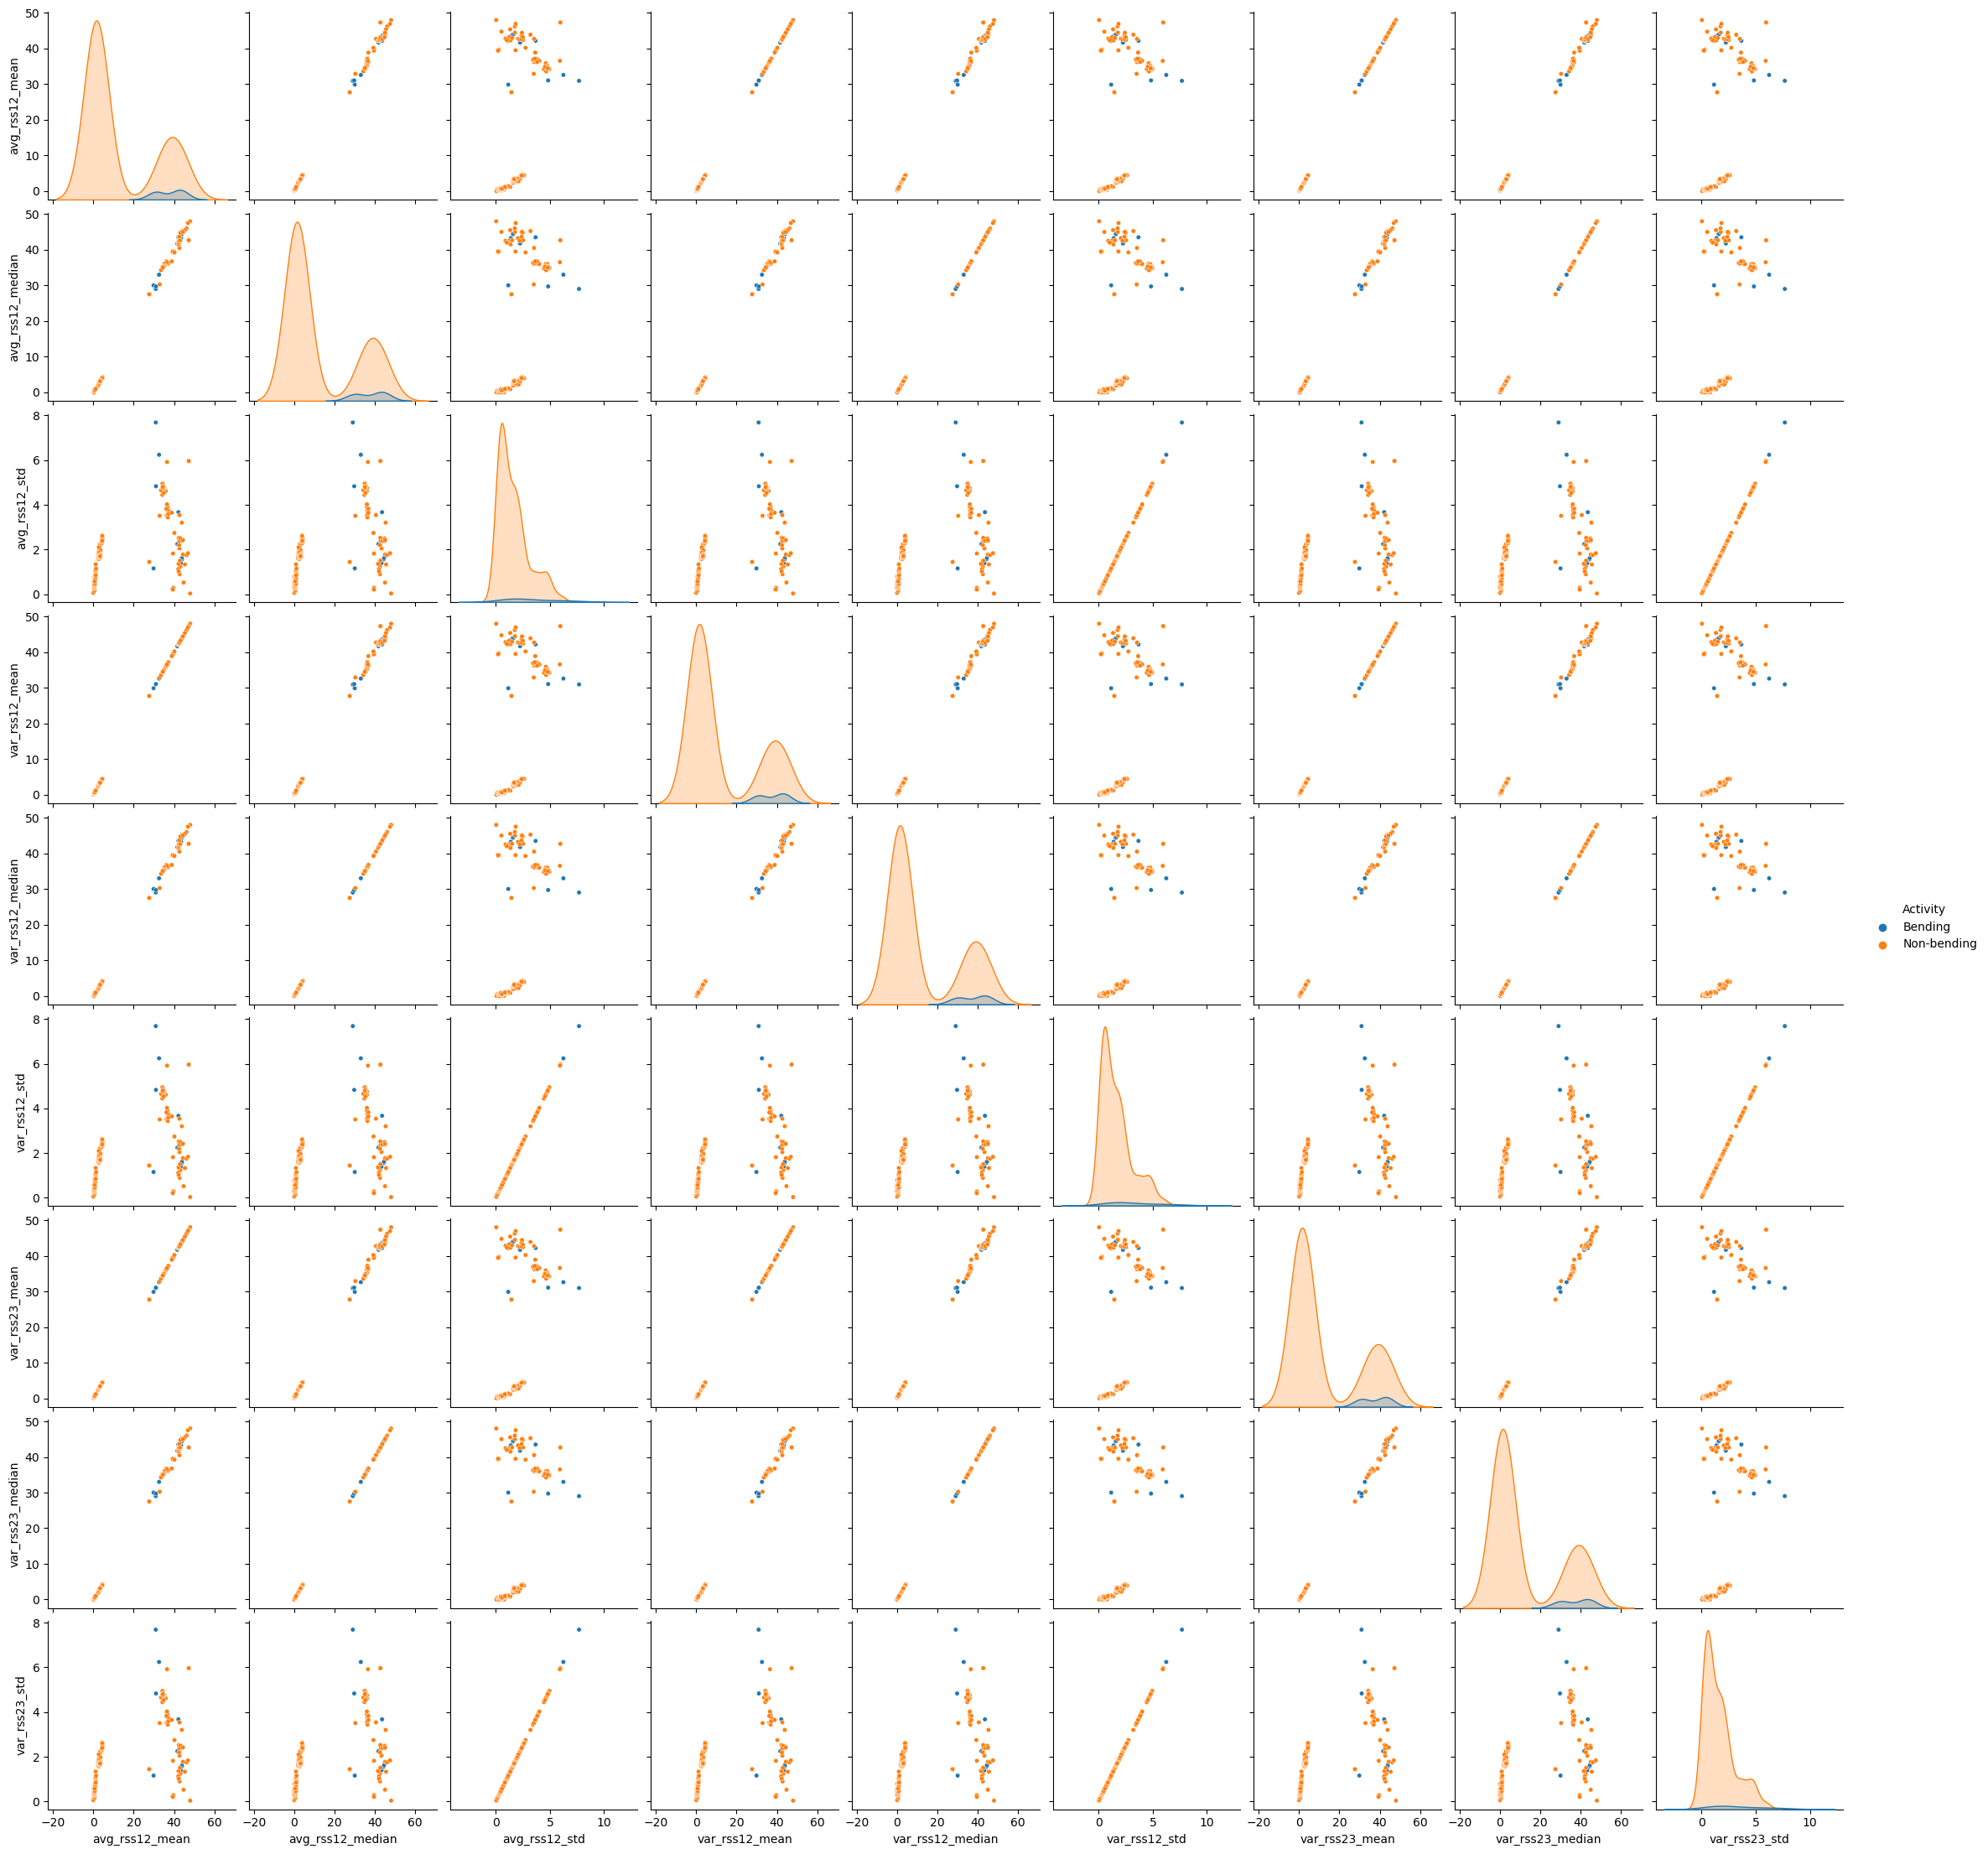

In [6]:
time_series = ['avg_rss12', 'var_rss12', 'var_rss23']
draw_all_scatter_plot(time_series, tr_set)

#### ii. Splitted Plots
Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 2(a)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 6. Do you see any considerable difference in the results with those of 2(a)i?

In [7]:
def break_time_series(dataset, num_parts):
    new_dataset = []
    for df in dataset:
        size = round(len(df) / num_parts)
        list_of_dfs = [df.iloc[i:i+size, :] for i in range(0, len(df), size)]
        temp_df = pd.DataFrame()
        for s in range(num_parts):
            # rearrange index for concating
            list_of_dfs[s].index = range(len(list_of_dfs[s]))
            # delete 'time' column
            temp_df = pd.concat([list_of_dfs[s].iloc[:, 1:], temp_df], axis=1, ignore_index=True)
        # Renumber the columns starting from 1
        temp_df.columns = range(1, temp_df.shape[1] + 1)
        # Breaking into 2 parts, concatenate them side-by-side
        new_dataset.append(temp_df)
    return new_dataset

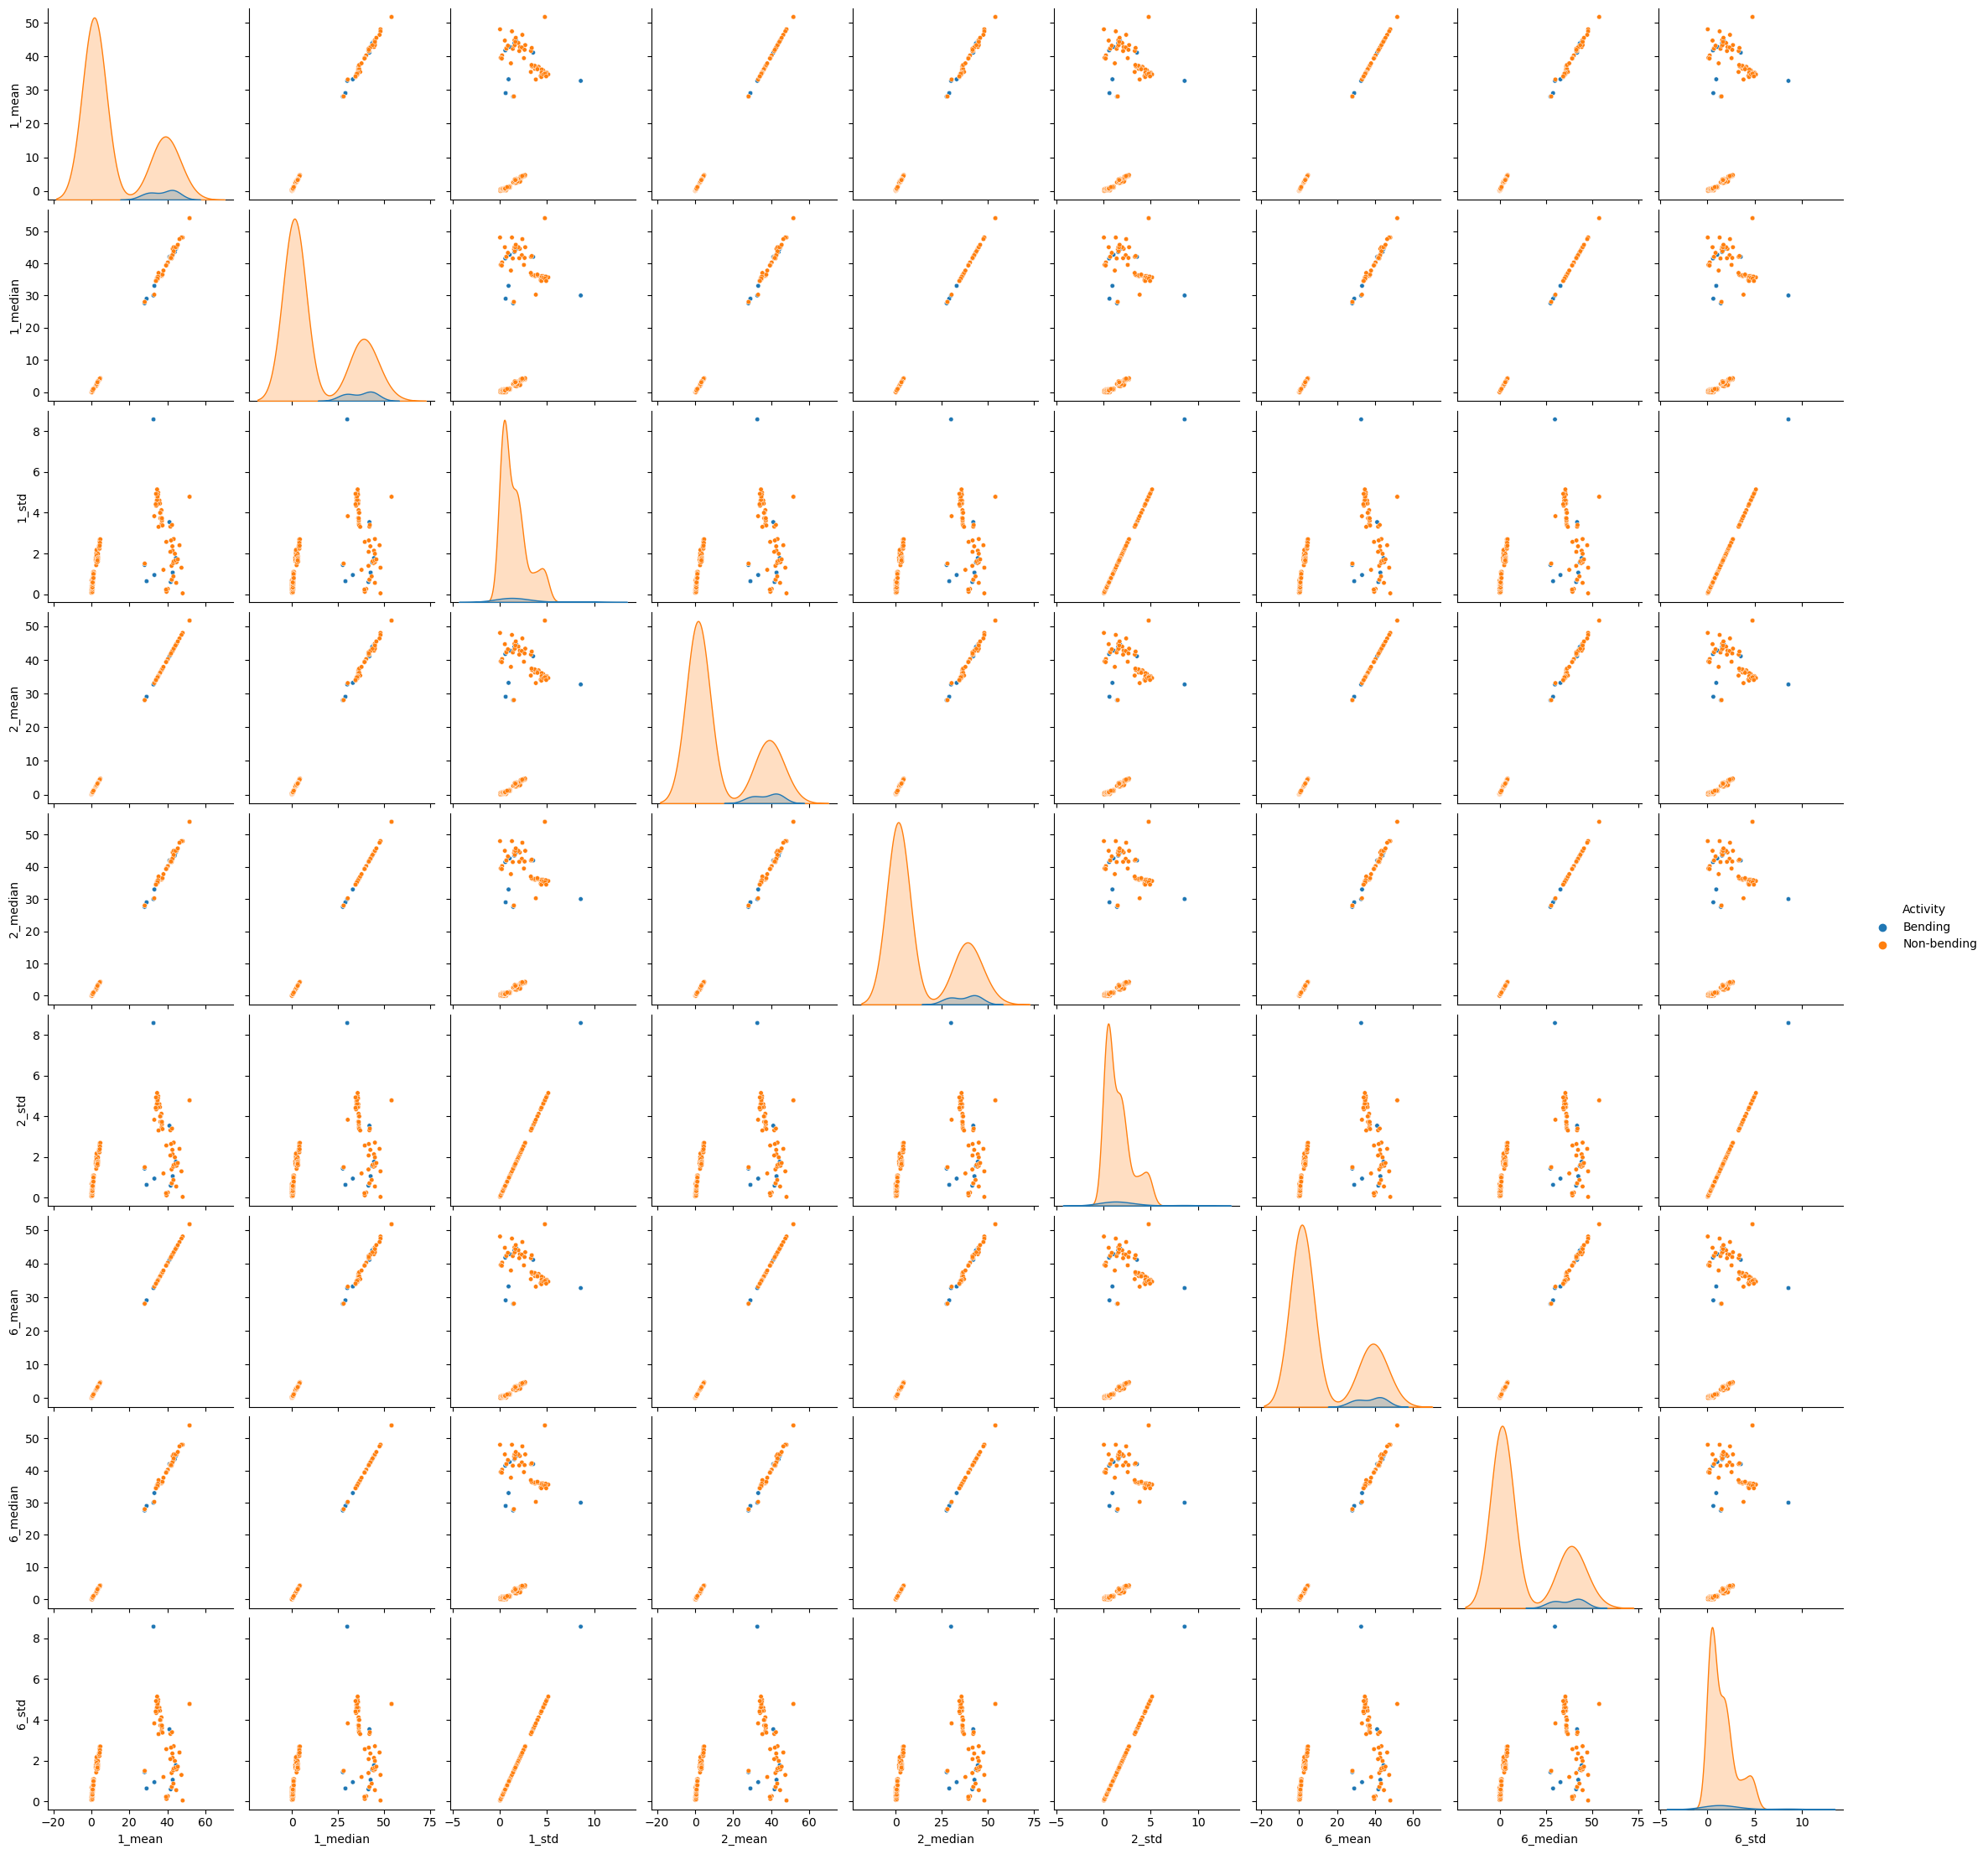

In [8]:
time_series = [1, 2, 6]
broken_two_tr_set = break_time_series(tr_set, 2)
draw_all_scatter_plot(time_series, broken_two_tr_set)

### Visually I do not see much differences betweeen base model versus ploting with the model splited first half and second half in terms of showing different patterns or clearer clusters than the original.

#### iii. Time Series Segments

In [38]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

def extract_features_from_series(series, l):
    features = []
    for segment in range(1, l*3+1, 3):  
        features.extend([series[segment].mean(), series[segment].median(), series[segment].std()])
    return features

for l in range(1, 21):  # for each l value from 1 to 20
    # 1. Break the time series
    broken_tr_set = break_time_series(tr_set, l)
    
    # 2. Feature extraction
    X_train = []  # features for training set
    y_train = []  # labels for training set
    
    for idx, series in enumerate(broken_tr_set):
        features = extract_features_from_series(series, l)
        X_train.append(features)
        
        # first 9 are bending, the rest are non-bending
        if idx < 9:
            y_train.append(1)
        else:
            y_train.append(0)

    try:
        # 3. Logistic regression with statsmodels for p-values
        X_with_const = sm.add_constant(X_train)  # adding a constant for the intercept
        model = sm.Logit(y_train, X_with_const).fit(disp=0)
        
        # Print p-values with statsmodels
        print(f"L = {l} P-values (using statsmodels):")
        print(model.pvalues)
        print("------------------------------")
    except np.linalg.LinAlgError:
        print(f"L = {l} encountered singular matrix error.")
        print("------------------------------")

L = 1 P-values (using statsmodels):
[0.88685226 0.66587759 0.7560961  0.67531601]
------------------------------
L = 2 P-values (using statsmodels):
[0.21047668 0.89071647 0.67923309 0.93877564 0.33430805 0.12725317
 0.73991904]
------------------------------
L = 3 P-values (using statsmodels):
[0.52113962 0.33055218 0.50838966 0.90134423 0.33935789 0.53938745
 0.475931   0.2013902  0.30806593 0.46025676]
------------------------------
L = 4 P-values (using statsmodels):
[0.54327734 0.35675102 0.33114734 0.23528109 0.95155585 0.91392433
 0.87080705 0.16200901 0.13448288 0.20141753 0.95026937 0.35694987
 0.70465356]
------------------------------
L = 5 P-values (using statsmodels):
[0.07546993 0.0727008  0.08939919 0.05980321 0.58959083 0.9181538
 0.67794478 0.73740298 0.34514854 0.41167743 0.92911521 0.83439513
 0.18298371 0.27656319 0.45413139 0.03379196]
------------------------------
L = 6 encountered singular matrix error.
------------------------------
L = 7 encountered singular m

#### Use 5-fold cross-validation to determine the best value of the pair (l, p), where p is the number of features used in recursive feature elimination

In [52]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

def extract_features_from_series(series, l):
    features = []
    for segment in range(1, l*3+1, 3):  
        features.extend([series[segment].mean(), series[segment].median(), series[segment].std()])
    return features

def get_target(dataset, count_bending=9):
    count = 0
    y_values = []
    x_values = []
    # assume bending is 1, non-bending is 0
    for df in dataset:
        count += 1
        if count <= count_bending:
            y_values.append(1)
        else:
            y_values.append(0)
        x_values.append(df)
    return x_values, y_values

def calculate_time_domain_features(dataset_list):
    row_data = []
    aggregated_data = []
    for ds in dataset_list:
        for col in ds:
            info = ds[col].describe()
            row_data.extend([info['mean'], info['50%'], info['std']])
        aggregated_data.append(row_data)
        row_data = []
    return pd.DataFrame(aggregated_data)

best_accuracy = 0.0
best_l = None
best_p = None

for l in range(1, 21):
    broken_training_set = break_time_series(tr_set, l)
    raw_data, y_train = get_target(broken_training_set)
    x_train = calculate_time_domain_features(raw_data)
    model = LogisticRegression(max_iter=1000)
    
    # create the RFECV model and select best attributes
    rfe = RFECV(model, step=1, cv=5, scoring='accuracy')
    rfe = rfe.fit(x_train, y_train)
    
    # Compute metrics
    f1_score_value = f1_score(y_train, rfe.predict(x_train))
    train_accuracy = rfe.score(x_train, y_train)

    if train_accuracy > best_accuracy:
        best_accuracy = train_accuracy
        best_l = l
        best_p = rfe.n_features_

    # Display results
    print('L:', l)
    print('F1 train score:', round(f1_score_value, 2))
    print('Accuracy:', round(train_accuracy, 2))
    print('Optimal number of features:', rfe.n_features_)
    print('Best features:', x_train.columns[rfe.support_])
    print('\n')


L: 1
F1 train score: 1.0
Accuracy: 1.0
Optimal number of features: 6
Best features: Int64Index([0, 3, 7, 10, 12, 14], dtype='int64')


L: 2
F1 train score: 1.0
Accuracy: 1.0
Optimal number of features: 10
Best features: Int64Index([1, 3, 10, 12, 25, 28, 30, 31, 32, 33], dtype='int64')


L: 3
F1 train score: 0.88
Accuracy: 0.97
Optimal number of features: 1
Best features: Int64Index([48], dtype='int64')


L: 4
F1 train score: 0.0
Accuracy: 0.87
Optimal number of features: 1
Best features: Int64Index([21], dtype='int64')


L: 5
F1 train score: 0.0
Accuracy: 0.87
Optimal number of features: 1
Best features: Int64Index([28], dtype='int64')


L: 6
F1 train score: 0.0
Accuracy: 0.87
Optimal number of features: 1
Best features: Int64Index([28], dtype='int64')


L: 7
F1 train score: 0.88
Accuracy: 0.97
Optimal number of features: 2
Best features: Int64Index([102, 120], dtype='int64')


L: 8
F1 train score: 0.88
Accuracy: 0.97
Optimal number of features: 1
Best features: Int64Index([138], dtype

#### Explain what the right way and the wrong way are to perform cross-validation in this problem.
#### : Using RFECV method to perform cross-validation is the right way and only possibe in this case. The p-value method wasn't able to correctly find the solutions maybe due to multicollinearity or over-specified models as seen from the high P-values across all different L s. It might have some situations like more predictors than observations.

#### iv. Confusion Matrix

#### Report the confusion matrix and show the ROC and AUC for your classifier on train data.

### Note :  In principle, fewer features can lead to simpler models which might generalize better. Given all this, while L=8 seems like a good choice based on the number of features. Tried L=1 0.687, L=2 0.820, L=10 0.685, L=16 0.617, L=17 0.395 but in this case L=2 get the highest R Squared value so I will use it.

Confusion matrix:
 [[60  0]
 [ 0  9]]


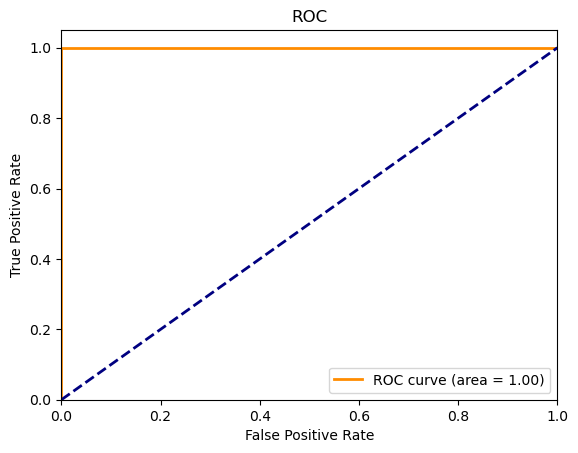

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

new_trainset = break_time_series(tr_set, 2) 
# L=1 0.687, L=2 0.820, L=10 0.685, L=16 0.617, L=17 0.395 Selecting L=2

base_data, y_train = get_target(new_trainset)
x_train = calculate_time_domain_features(base_data)
selected_columns = [1, 3, 10, 12, 25, 28, 30, 31, 32, 33]  # Selected features
x_train = x_train.iloc[:, selected_columns]

# Logistic Regression using scikit-learn
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_train)
confusion_matrix_result = confusion_matrix(y_train, y_pred)
print('Confusion matrix:\n', confusion_matrix_result)

# ROC Curve Plotting
y_score = logreg.decision_function(x_train)
fpr, tpr, threshold = roc_curve(y_train, y_score) 
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

#### Report the parameters of your logistic regression βi’s as well as the p-values associated with them

In [64]:
# Ordinary Least Squares using Statsmodels
ols_model = sm.OLS(y_train, x_train).fit()
print(ols_model.summary())
print(ols_model.pvalues, '\n')

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.820
Model:                            OLS   Adj. R-squared (uncentered):              0.790
Method:                 Least Squares   F-statistic:                              26.96
Date:                Mon, 09 Oct 2023   Prob (F-statistic):                    2.02e-18
Time:                        06:40:05   Log-Likelihood:                          31.613
No. Observations:                  69   AIC:                                     -43.23
Df Residuals:                      59   BIC:                                     -20.89
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### v. Test Classifier

In [69]:
# get train data and label
new_trainset = break_time_series(tr_set, 2)  # Selecting L=2
base_data, y_train = get_target(new_trainset)
x_train = calculate_time_domain_features(base_data)

# get test data and label
new_testset = break_time_series(te_set, 2)
base_data_te, y_test = get_target(new_testset, 4) # There are only 4 testset classified bending
x_test = calculate_time_domain_features(base_data_te)

model = LogisticRegression(max_iter=1000)
# create the RFECV model
rfe = RFECV(model, step=1, cv=5, scoring='accuracy')
rfe = rfe.fit(x_train, y_train)

train_accuracy = rfe.score(x_train, y_train)
test_accuracy = rfe.score(x_test, y_test)

# print results
print('Train accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)
print('Number of selected features:', rfe.n_features_) # to confirm it uses the same features
print('Selected features:', np.where(rfe.support_)[0])  # print the indices of selected features


Train accuracy: 1.0
Test accuracy: 1.0
Number of selected features: 10
Selected features: [ 1  3 10 12 25 28 30 31 32 33]


#### vi. Separation

### It looks like they do have instability since due to incurring many singular matrix erros and the values we get is seemed to be well-separated.

#### vii. Imbalance

### (b) Binary Classification Using L1-penalized logistic regression

#### i. Time Series Segments

#### ii. Comparison

### (c) Multi-class Classification (The Realistic Case)

#### i. Time Series Segments

#### ii. Naive Bayes

#### ii. Comparison

## 3. ISLR 4.8.3

## 4. ISLR 4.8.7

## 5.1. Extra Practice ISLR 4.8.4

## 5.2. Extra Practice ISLR 4.8.9